In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import csv
import contextily as cx

In [2]:
slc_zcta_list_path = './zcta_data/slc_zcta.csv'

slc_zcta_list = []

with open(slc_zcta_list_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        int_row = [int(i) for i in row]
        slc_zcta_list.append(int_row)
        
slc_zcta_list = [item for sublist in slc_zcta_list for item in sublist]

In [3]:
# Load the shapefile
slc_shapefile_path = 'zcta_data/slc_zcta.shp'
slc_gdf = gpd.read_file(slc_shapefile_path)

In [4]:
# Load the race population data
race_pop_path = './data/census_data/race_pop_by_latino_df.csv'
race_pop_df = pd.read_csv(race_pop_path)
race_pop_df = race_pop_df[race_pop_df['ZCTA5'].isin(slc_zcta_list)]
# df.columns = race_pop_df.columns.str.replace('\t', '')
race_pop_df.columns = race_pop_df.columns.str.strip()
race_pop_df = race_pop_df.replace(',','', regex=True)
race_pop_df = race_pop_df.astype(int)
race_pop_df = race_pop_df.reset_index(drop=True)

# nonwhite_race = ['Hispanic or Latino', 'Black or African American alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone', 'Some Other Race alone', 'Population of two races:', 'Population of three races:', 'Population of four races:', 'Population of five races:', 'Population of six races:']

race_pop_df['Perc_Hispanic_Latino'] = round((race_pop_df['Hispanic or Latino'] / race_pop_df['Total:'])*100, 1)
race_pop_df['Perc_Black'] = round((race_pop_df['Black or African American alone'] / race_pop_df['Total:'])*100, 1)
race_pop_df['Perc_NonWhite'] = round(((race_pop_df['Total:'] - race_pop_df['White alone']) / race_pop_df['Total:'])*100, 1)

race_pop_df.head()

,ZCTA5,Total:,Hispanic or Latino,Not Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two races:,Population of three races:,Population of four races:,Population of five races:,Population of six races:,Perc_Hispanic_Latino,Perc_Black,Perc_NonWhite
0,84006,829,71,758,683,3,10,1,12,6,42,1,0,0,0,8.6,0.4,17.6
1,84009,38347,3994,34353,29916,376,75,1658,463,154,1589,121,0,1,0,10.4,1.0,22.0
2,84020,51017,4728,46289,40534,654,270,2281,228,217,2007,94,4,0,0,9.3,1.3,20.5
3,84044,29284,10069,19215,16441,403,171,338,781,115,915,45,6,0,0,34.4,1.4,43.9
4,84047,37146,8507,28639,23287,979,293,1587,546,238,1606,93,10,0,0,22.9,2.6,37.3


In [5]:
race_pop_gdf = slc_gdf.merge(race_pop_df, left_on='ZCTA5', right_on='ZCTA5')
# race_pop_gdf.head()

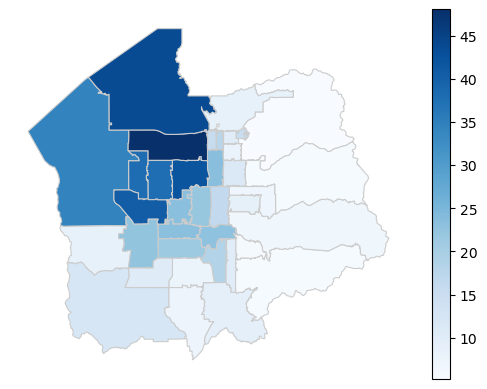

In [6]:
race_pop_gdf.plot(column='Perc_Hispanic_Latino', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.axis('off')
plt.show()

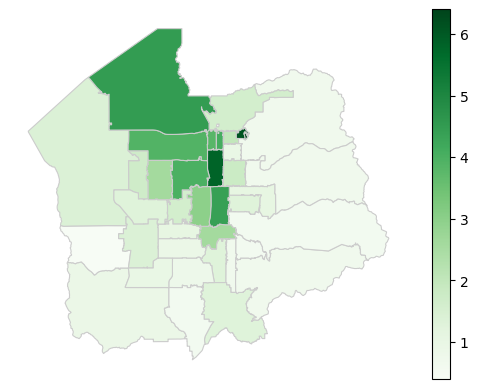

In [7]:
race_pop_gdf.plot(column='Perc_Black', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True)
plt.axis('off')
plt.show()

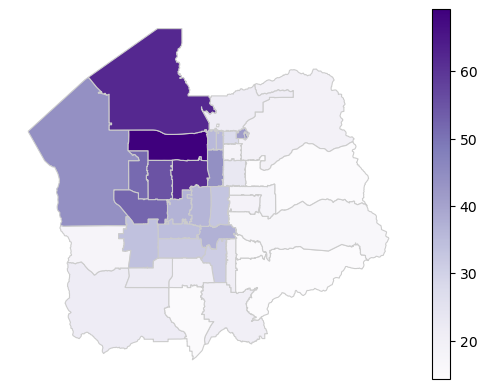

In [8]:
race_pop_gdf.plot(column='Perc_NonWhite', cmap='Purples', linewidth=0.8, edgecolor='0.8', legend=True)
plt.axis('off')
plt.show()

In [9]:
# Load the income bracket data
income_brac_path = './data/census_data/income_brac_df.csv'
income_brac_df = pd.read_csv(income_brac_path)
income_brac_df = income_brac_df[income_brac_df['ZCTA5'].isin(slc_zcta_list)]
income_brac_df.columns = income_brac_df.columns.str.strip()
income_brac_df = income_brac_df.replace(',','', regex=True)
income_brac_df = income_brac_df.astype(int)
income_brac_df = income_brac_df.reset_index(drop=True)

income_brac_df.head()

,ZCTA5,Total:,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
0,84006,336,1,0,0,2,11,27,0,13,29,56,68,26,79,7,7,10
1,84009,10682,148,95,36,83,136,199,86,111,123,369,1072,1688,1893,1397,1485,1761
2,84020,14910,321,215,206,179,165,222,183,234,609,715,1277,1692,1915,1297,2097,3583
3,84044,8906,241,117,269,161,285,233,387,582,273,768,1417,1396,1205,984,418,170
4,84047,15321,714,583,395,577,442,663,720,865,681,1095,2606,2183,1482,839,876,600


In [10]:
income_brac_gdf = slc_gdf.merge(income_brac_df, left_on='ZCTA5', right_on='ZCTA5')
# income_brac_gdf.head()


In [11]:
# Load the median household income data
median_hh_income_path = './data/census_data/median_hh_income_df.csv'
median_hh_income_df = pd.read_csv(median_hh_income_path)
median_hh_income_df = median_hh_income_df[median_hh_income_df['ZCTA5'].isin(slc_zcta_list)]
median_hh_income_df.columns = median_hh_income_df.columns.str.strip()
median_hh_income_df = median_hh_income_df.replace(',','', regex=True)
median_hh_income_df = median_hh_income_df.replace('-', np.nan)
median_hh_income_df = median_hh_income_df.rename(columns={'Median household income in the past 12 months (in 2021 inflation-adjusted dollars)': 'Median_HH_Income'})
median_hh_income_df['Median_HH_Income'] = median_hh_income_df['Median_HH_Income'].astype(float)
median_hh_income_df = median_hh_income_df.reset_index(drop=True)

median_hh_income_df.head()

,ZCTA5,Median_HH_Income
0,84006,70076.0
1,84009,114664.0
2,84020,116977.0
3,84044,72705.0
4,84047,65501.0


In [12]:
median_hh_income_gdf = slc_gdf.merge(median_hh_income_df, left_on='ZCTA5', right_on='ZCTA5')
# income_brac_gdf.head()

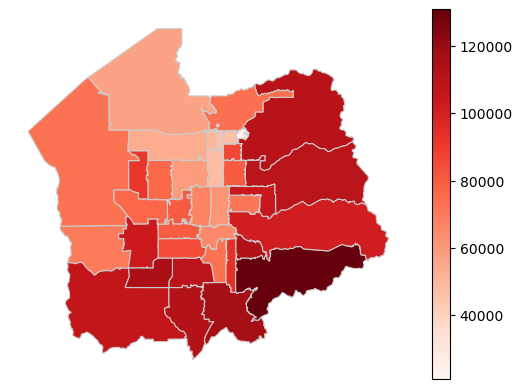

In [13]:
median_hh_income_gdf.plot(column='Median_HH_Income', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)
plt.axis('off')
plt.show()

In [14]:
# Load median house value data
house_value_path = './data/census_data/median_house_value_df.csv'
house_value_df = pd.read_csv(house_value_path)
house_value_df = house_value_df[house_value_df['ZCTA5'].isin(slc_zcta_list)]
house_value_df.columns = house_value_df.columns.str.strip()
house_value_df = house_value_df.replace(',','', regex=True)
house_value_df = house_value_df.replace('-', np.nan)
house_value_df = house_value_df.rename(columns={'Median value (dollars)': 'Median_House_Value'})
house_value_df['Median_House_Value'] = house_value_df['Median_House_Value'].astype(float)
house_value_df = house_value_df.reset_index(drop=True)

house_value_df.head()

,ZCTA5,Median_House_Value
0,84006,274600.0
1,84009,424600.0
2,84020,569700.0
3,84044,252900.0
4,84047,297400.0


In [15]:
house_value_gdf = slc_gdf.merge(house_value_df, left_on='ZCTA5', right_on='ZCTA5')
# house_value_gdf.head()

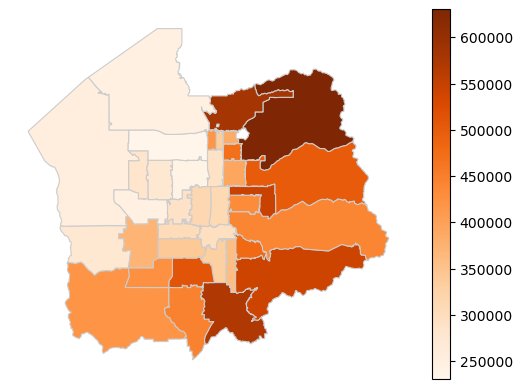

In [16]:
house_value_gdf.plot(column='Median_House_Value', cmap='Oranges', linewidth=0.8, edgecolor='0.8', legend=True)
plt.axis('off')
plt.show()

In [17]:
# Load per captia income data
per_cap_income_path = './data/census_data/per_cap_income_df.csv'
per_cap_income_df = pd.read_csv(per_cap_income_path)
per_cap_income_df = per_cap_income_df[per_cap_income_df['ZCTA5'].isin(slc_zcta_list)]
per_cap_income_df.columns = per_cap_income_df.columns.str.strip()
per_cap_income_df = per_cap_income_df.replace(',','', regex=True)
per_cap_income_df = per_cap_income_df.replace('-', np.nan)
per_cap_income_df = per_cap_income_df.rename(columns={'Per capita income in the past 12 months (in 2021 inflation-adjusted dollars)': 'Per_Capita_Income_Value'})
per_cap_income_df['Per_Capita_Income_Value'] = per_cap_income_df['Per_Capita_Income_Value'].astype(float)
per_cap_income_df = per_cap_income_df.reset_index(drop=True)

per_cap_income_df.head()

,ZCTA5,Per_Capita_Income_Value
0,84006,27221.0
1,84009,38979.0
2,84020,48466.0
3,84044,25556.0
4,84047,33853.0


In [18]:
per_cap_income_gdf = slc_gdf.merge(per_cap_income_df, left_on='ZCTA5', right_on='ZCTA5')
# per_cap_income_gdf.head()

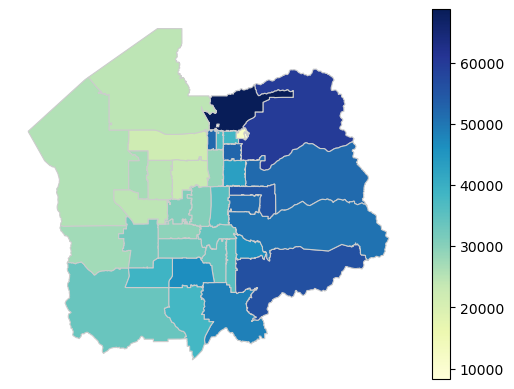

In [19]:
per_cap_income_gdf.plot(column='Per_Capita_Income_Value', cmap='YlGnBu', linewidth=0.8, edgecolor='0.8', legend=True)
plt.axis('off')
plt.show()

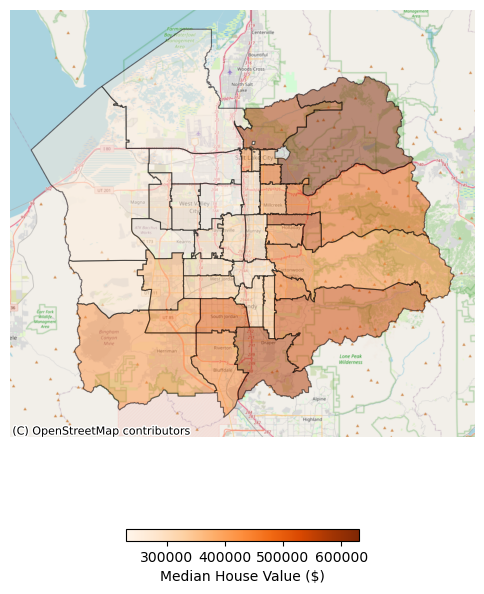

In [37]:
from matplotlib import legend


avy_neutralmap = house_value_gdf.to_crs(epsg=3857).plot(figsize=(6, 8), # Set the figure size
                                                alpha=0.5, # Set the transparency
                                                column='Median_House_Value',
                                                legend=True,
                                                cmap='Oranges',
                                                linewidth=0.8,
                                                edgecolor='0',
                                                legend_kwds={'label': "Median House Value ($)", 'shrink': 0.5, 'orientation': 'horizontal'})
cx.add_basemap(ax=avy_neutralmap, # Add the basemap
               crs='EPSG:3857', # Set the coordinate reference system
               source=cx.providers.OpenStreetMap.Mapnik) # Set the source of the basemap
# avy_neutralmap.set_title('Avalanche Locations by Region in Utah', fontsize=14) # Add the title
avy_neutralmap.set_axis_off() # Turn off the axis